## Plot of the length distribution for our datasets vs the rest

One plot with three subplots:
- First row is length distribution of UTR
- Second row is for pri-miRNA
- Third row is all the rest of data (Ribo, bpRNA, ArchiveII, RNAstralign, synthetic, zuber ...)

Use shared x axis

**Assigned to**: Colin

Use Ploty, and a white background

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
import os

In [38]:
def get_lengths(data):
    lens = []
    for i in data:
        seq = data[i]['sequence']
        lens.append(len(seq))
    return lens

In [39]:
with open('data/pri-mirna.json') as f:
    pri_miRNA_data = json.load(f)
pri_miRNA_data = get_lengths(pri_miRNA_data)
print(np.min(pri_miRNA_data))
print(np.max(pri_miRNA_data))

230
230


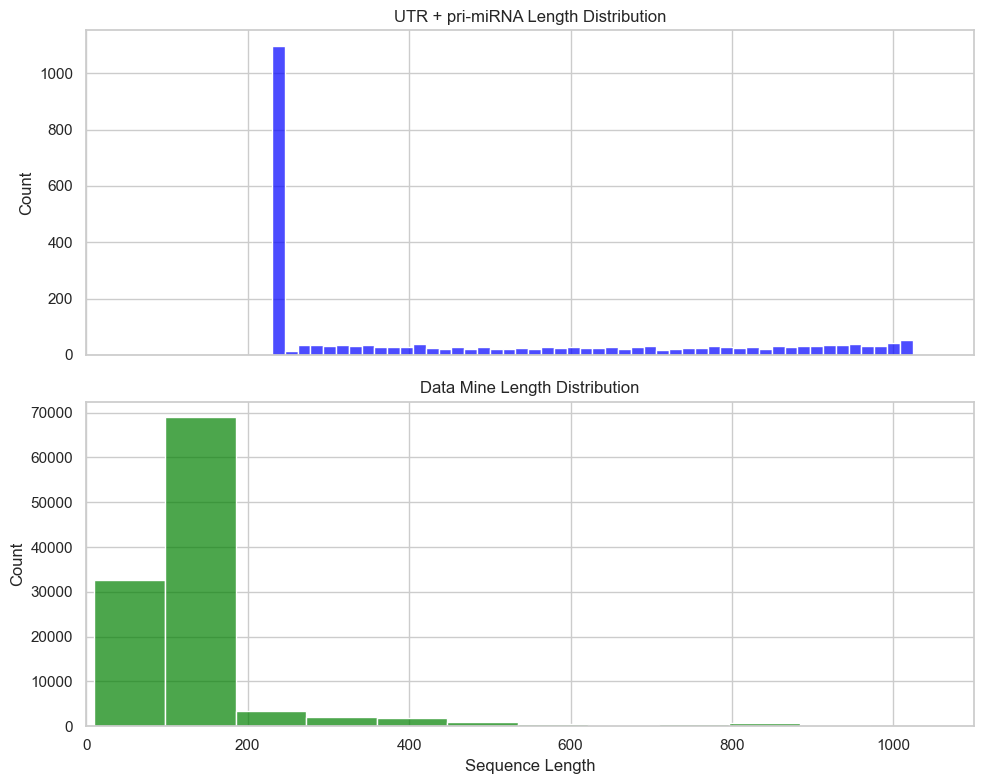

In [47]:
with open('other_data/yack_train.json') as f:
    other_data = json.load(f)


#with open('data/pri-mirna.json') as f:
 #   pri_miRNA_data = json.load(f)

utr_data = {}
folder_path = 'data/'
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)

        # Load data from the current JSON file
        with open(file_path) as f:
            current_data = json.load(f)

        # Combine data into the main dictionary
        utr_data.update(current_data)

utr_data = get_lengths(utr_data)
#pri_miRNA_data = get_lengths(pri_miRNA_data)
other_data = get_lengths(other_data)
# Create subplots using Seaborn
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Set Seaborn style
sns.set(style="whitegrid")

# Plot UTR data stat="density"
sns.histplot(utr_data, bins=50, color='blue', alpha=0.7, ax=axs[0])
axs[0].set_title('UTR + pri-miRNA Length Distribution')
axs[0].set_ylabel('Count')

# Plot pri-miRNA data
sns.histplot(other_data, bins=50, color='green', alpha=0.7, ax=axs[1])
axs[1].set_title('Data Mine Length Distribution')
axs[1].set_ylabel('Count')

# Plot other data
#sns.histplot(other_data, bins=50, stat="density", color='orange', alpha=0.7, ax=axs[2])
#axs[2].set_title('Other Data Length Distribution')
#axs[2].set_ylabel('Frequency')
axs[1].set_xlabel('Sequence Length')

# Adjust layout
plt.xlim((0,1100))
plt.tight_layout()

# Show the plot
plt.savefig('Fig-2-len-dist.png')
plt.show()